In [1]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

SUBMISSION 11 Milestone
The task was to predict the total_claims for week 42
For each week there is a distinct list of uu_ids with unique uu_id in the table called prediction_list
Predict a value for each of those uu_ids
The list is changing over time (given the streaming nature of the data)

In [2]:
get_ipython().run_cell_magic('capture', '', "\n# INSTALL ADDITIONAL LIBRARIES IF REQUIRED\n# ------------------------------------------\n# This is normally not required. The hub environment comes preinstaled with \n# many packages that you can already use without setup. In case there is some\n# other library you would like to use that isn't on the list you run this command\n# once to install them.  If it is already installed this command has no effect.\n\n!python3 -m pip install pandas\n!python3 -m pip install [ensorflow]\n!python3 -m pip install [Keras]\n!python3 -m pip install [Pytorch]\n")

INSTALL PACKAGES

In [3]:
get_ipython().system('pip install db-dtypes')

IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [4]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import statsmodels.api as sm
import math

IMPORT THE DATASET

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [6]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

IMPORT IRONHACKS DATA

In [7]:
import os
BIGQUERY_PROJECT = 'ironhacks-data'

In [8]:
bigquery.Client(project=BIGQUERY_PROJECT)

IMPORT THE LINEAR REGRESSION MODEL

In [9]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

IMPORT PACKAGE THE LINEAR REGRESSION MODEL- SCIKIT-LEARN 
SOURCE: https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
NUMPY IS A FUNDAMENTAL PUYTHON SCIENTIFIC PACKAGE THAT ALLOWS MANY HIGH PEROFORMATION OPERATION SON A SINGLE AND MULTI DIMENSIONAL ARRAYS.
SOURCE: https://realpython.com/linear-regression-in-python/#python-packages-for-linear-regression

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [11]:
# DEFINING THE DATA; INPUTS (REGRESSOR.X) AND OUTPUTS (RESPONSE.Y)
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

DEFINE YOUR CLASSES AND FUNCTIONS 
-----------------------------------
This is not required, but is helpful in keeping your notebook organized. 
You can use the following cell or several cells to define your functions
and classes to keep them separate from your analysis or results code.
In general it useful to define your methods in a separate cell from where
it is run.

In [12]:
def example_function():
    print('Hello World')

In [13]:
# CREATE A LINEAR REGRESSION MODEL
model = LinearRegression()

START USING A MODEL - .fit() fits the model
SOURCE: REAL PYTHON - https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn

In [14]:
model.fit(x,y)
LinearRegression

sklearn.linear_model._base.LinearRegression

In [15]:
# GET RESULTS - NOW THAT THE MODEL HAS BEEN FITTED; LET SEE IF IT WORKS!
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


THE RETURN VALUE SHOULD BE R2

DETERMIINE HOW TO GET b0 and b1 (scikit-learn)
intercept and coefficient are estimated values

In [16]:
new_model = LinearRegression().fit(x,y.reshape((-1,1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [17]:
# DETERMIINE HOW TO GET b0 and b1 (scikit-learn)
# intercept and coefficient are estimated values
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [18]:
# NOW THAT WE KNOW OUR MODEL IS WORKING; LET'S PREDICT A RESPONSE!
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


HERE'S ANOTHER WAY TO PREDICT THE RESPONSE
THIS IS WERE EACH ELEMENT OF X WERE MULTIPLIED BY WITH THE MODEL COEFFICIENT

In [19]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


REGRESSION MODELS ARE TYPCIALLY USED FOR FORECASTS
FITTED MODELS CAN BE USED TO CALCULATE THE OUTPUTS

In [20]:
x_new = np.arange(5). reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [21]:
# REGRESSION MODELS ARE TYPCIALLY USED FOR FORECASTS
# FITTED MODELS CAN BE USED TO CALCULATE THE OUTPUTS
y_new = model.predict(x_new)
y_new

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

Obtain data using BigQuery

In [22]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [23]:
query = """
SELECT
x.*,
y.average_wage
FROM
(SELECT
*
FROM `ironhacks-data.ironhacks_competition.unemployment_data`) x
JOIN `ironhacks-data.ironhacks_competition.wage_data` y
ON x.uu_id = y.uu_id
"""

In [24]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()

In [25]:
query_pred = """
SELECT * FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [26]:
query_job_pred = bigquery_client.query(query_pred)
data_pred_query= query_job_pred.to_dataframe()

In [27]:
# START USING A MODEL - Same statement written differently
model = LinearRegression().fit(x,y)

In [28]:
# GET RESULTS - NOW THAT THE MODEL HAS BEEN FITTED; LET SEE IF IT WORKS!
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


THE RETURN VALUE SHOULD BE R2

In [29]:
# Linear Regression
model.fit(x, y)
LinearRegression()

LinearRegression()

In [30]:
# Test Linear Regression
model = LinearRegression().fit(x, y)

In [31]:
# Test Linear Regression
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [32]:
# Test Linear Regression
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [33]:
# Test Linear Regression
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [34]:
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [35]:
# Test Linear Regression
x_new = np.arange(5).reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [36]:
# Test Linear Regression
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [37]:
# Test Linear Regression
y

array([ 5, 20, 14, 32, 22, 38])

In [38]:
# Test Linear Regression
model = LinearRegression().fit(x, y)

In [39]:
# Test Linear Regression
model = sm.OLS(y, x)

In [40]:
# Test Linear Regression
results = model.fit()

install conda install module_name

In [41]:
# Test Linear Regression
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              66.71
Date:                Fri, 21 Apr 2023   Prob (F-statistic):                    0.000447
Time:                        18:25:51   Log-Likelihood:                         -19.692
No. Observations:                   6   AIC:                                      41.38
Df Residuals:                       5   BIC:                                      41.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [42]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [44]:
print(prestige_model.summary())

NameError: name 'prestige_model' is not defined

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

dta = pd.read_csv("http://www.stat.ufl.edu/~aa/social/csv_files/statewide-crime-2.csv")
dta = dta.set_index("State", inplace=True).dropna()
dta.rename(columns={"VR" : "crime",
                   "MR" : "murder",
                   "M"  : "pctmetro",
                   "W"  : "pctwhite",
                   "H"  : "pcths",
                   "P"  : "poverty",
                   "S"  : "single"
                   }, inplace=True)

crime_model = ols("murder ~ pctmetro + poverty + pcths + single", data=dta).fit()

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

dta = pd.read_csv("http://www.stat.ufl.edu/~aa/social/csv_files/statewide-crime-2.csv")
dta = dta.set_index("State", inplace=True).dropna()
dta.rename(columns={"VR" : "crime",
                   "MR" : "murder",
                   "M"  : "pctmetro",
                   "W"  : "pctwhite",
                   "H"  : "pcths",
                   "P"  : "poverty",
                   "S"  : "single"
                   }, inplace=True)

crime_model = ols("murder ~ pctmetro + poverty + pcths + single", data=dta).fit()

In [45]:
dta = sm.datasets.statecrime.load_pandas().data

In [46]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/plots_boxplots.html
get_ipython().run_line_magic('matplotlib', 'inline')

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

STAT Models
https://www.statsmodels.org/dev/examples/notebooks/generated/plots_boxplots.html

In [48]:
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = [
    "Strong Democrat",
    "Weak Democrat",
    "Independent-Democrat",
    "Independent-Independent",
    "Independent-Republican",
    "Weak Republican",
    "Strong Republican",
]

STAT Models
https://www.statsmodels.org/dev/examples/notebooks/generated/plots_boxplots.html

In [49]:
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = [
    "Strong Democrat",
    "Weak Democrat",
    "Independent-Democrat",
    "Independent-Independent",
    "Independent-Republican",
    "Weak Republican",
    "Strong Republican",
]

In [50]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

SUBMISSION 11 Milestone
The task was to predict the total_claims for week 42
For each week there is a distinct list of uu_ids with unique uu_id in the table called prediction_list
Predict a value for each of those uu_ids
The list is changing over time (given the streaming nature of the data)

In [51]:
get_ipython().run_cell_magic('capture', '', "\n# INSTALL ADDITIONAL LIBRARIES IF REQUIRED\n# ------------------------------------------\n# This is normally not required. The hub environment comes preinstaled with \n# many packages that you can already use without setup. In case there is some\n# other library you would like to use that isn't on the list you run this command\n# once to install them.  If it is already installed this command has no effect.\n\n!python3 -m pip install pandas\n!python3 -m pip install [ensorflow]\n!python3 -m pip install [Keras]\n!python3 -m pip install [Pytorch]\n")

INSTALL PACKAGES

In [52]:
get_ipython().system('pip install db-dtypes')

IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [53]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import statsmodels.api as sm
import math

IMPORT THE DATASET

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [55]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

IMPORT IRONHACKS DATA

In [56]:
import os
BIGQUERY_PROJECT = 'ironhacks-data'

In [57]:
bigquery.Client(project=BIGQUERY_PROJECT)

IMPORT THE LINEAR REGRESSION MODEL

In [58]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

IMPORT PACKAGE THE LINEAR REGRESSION MODEL- SCIKIT-LEARN 
SOURCE: https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
NUMPY IS A FUNDAMENTAL PUYTHON SCIENTIFIC PACKAGE THAT ALLOWS MANY HIGH PEROFORMATION OPERATION SON A SINGLE AND MULTI DIMENSIONAL ARRAYS.
SOURCE: https://realpython.com/linear-regression-in-python/#python-packages-for-linear-regression

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [60]:
# DEFINING THE DATA; INPUTS (REGRESSOR.X) AND OUTPUTS (RESPONSE.Y)
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

DEFINE YOUR CLASSES AND FUNCTIONS 
-----------------------------------
This is not required, but is helpful in keeping your notebook organized. 
You can use the following cell or several cells to define your functions
and classes to keep them separate from your analysis or results code.
In general it useful to define your methods in a separate cell from where
it is run.

In [61]:
def example_function():
    print('Hello World')

In [62]:
# CREATE A LINEAR REGRESSION MODEL
model = LinearRegression()

START USING A MODEL - .fit() fits the model
SOURCE: REAL PYTHON - https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn

In [63]:
model.fit(x,y)
LinearRegression

sklearn.linear_model._base.LinearRegression

In [64]:
# GET RESULTS - NOW THAT THE MODEL HAS BEEN FITTED; LET SEE IF IT WORKS!
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


THE RETURN VALUE SHOULD BE R2

DETERMIINE HOW TO GET b0 and b1 (scikit-learn)
intercept and coefficient are estimated values

In [65]:
new_model = LinearRegression().fit(x,y.reshape((-1,1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [66]:
# DETERMIINE HOW TO GET b0 and b1 (scikit-learn)
# intercept and coefficient are estimated values
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [67]:
# NOW THAT WE KNOW OUR MODEL IS WORKING; LET'S PREDICT A RESPONSE!
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


HERE'S ANOTHER WAY TO PREDICT THE RESPONSE
THIS IS WERE EACH ELEMENT OF X WERE MULTIPLIED BY WITH THE MODEL COEFFICIENT

In [68]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


REGRESSION MODELS ARE TYPCIALLY USED FOR FORECASTS
FITTED MODELS CAN BE USED TO CALCULATE THE OUTPUTS

In [69]:
x_new = np.arange(5). reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [70]:
# REGRESSION MODELS ARE TYPCIALLY USED FOR FORECASTS
# FITTED MODELS CAN BE USED TO CALCULATE THE OUTPUTS
y_new = model.predict(x_new)
y_new

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

Obtain data using BigQuery

In [71]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [72]:
query = """
SELECT
x.*,
y.average_wage
FROM
(SELECT
*
FROM `ironhacks-data.ironhacks_competition.unemployment_data`) x
JOIN `ironhacks-data.ironhacks_competition.wage_data` y
ON x.uu_id = y.uu_id
"""

In [73]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()

In [74]:
query_pred = """
SELECT * FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [75]:
query_job_pred = bigquery_client.query(query_pred)
data_pred_query= query_job_pred.to_dataframe()

In [76]:
# START USING A MODEL - Same statement written differently
model = LinearRegression().fit(x,y)

In [77]:
# GET RESULTS - NOW THAT THE MODEL HAS BEEN FITTED; LET SEE IF IT WORKS!
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


THE RETURN VALUE SHOULD BE R2

In [78]:
# Linear Regression
model.fit(x, y)
LinearRegression()

LinearRegression()

In [79]:
# Test Linear Regression
model = LinearRegression().fit(x, y)

In [80]:
# Test Linear Regression
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [81]:
# Test Linear Regression
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [82]:
# Test Linear Regression
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [83]:
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [84]:
# Test Linear Regression
x_new = np.arange(5).reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [85]:
# Test Linear Regression
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [86]:
# Test Linear Regression
y

array([ 5, 20, 14, 32, 22, 38])

In [87]:
# Test Linear Regression
model = LinearRegression().fit(x, y)

In [88]:
# Test Linear Regression
model = sm.OLS(y, x)

In [89]:
# Test Linear Regression
results = model.fit()

install conda install module_name

In [90]:
# Test Linear Regression
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              66.71
Date:                Fri, 21 Apr 2023   Prob (F-statistic):                    0.000447
Time:                        18:28:23   Log-Likelihood:                         -19.692
No. Observations:                   6   AIC:                                      41.38
Df Residuals:                       5   BIC:                                      41.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [91]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [92]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

dta = pd.read_csv("http://www.stat.ufl.edu/~aa/social/csv_files/statewide-crime-2.csv")
dta = dta.set_index("State", inplace=True).dropna()
dta.rename(columns={"VR" : "crime",
                   "MR" : "murder",
                   "M"  : "pctmetro",
                   "W"  : "pctwhite",
                   "H"  : "pcths",
                   "P"  : "poverty",
                   "S"  : "single"
                   }, inplace=True)

crime_model = ols("murder ~ pctmetro + poverty + pcths + single", data=dta).fit()

In [93]:
dta = sm.datasets.statecrime.load_pandas().data

LINEAR REGRESSION
TOWARD DATA SCIENCE https://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a

In [94]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/plots_boxplots.html
get_ipython().run_line_magic('matplotlib', 'inline')

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

STAT Models
https://www.statsmodels.org/dev/examples/notebooks/generated/plots_boxplots.html

In [96]:
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = [
    "Strong Democrat",
    "Weak Democrat",
    "Independent-Democrat",
    "Independent-Independent",
    "Independent-Republican",
    "Weak Republican",
    "Strong Republican",
]

Text(0, 0.5, 'Age')

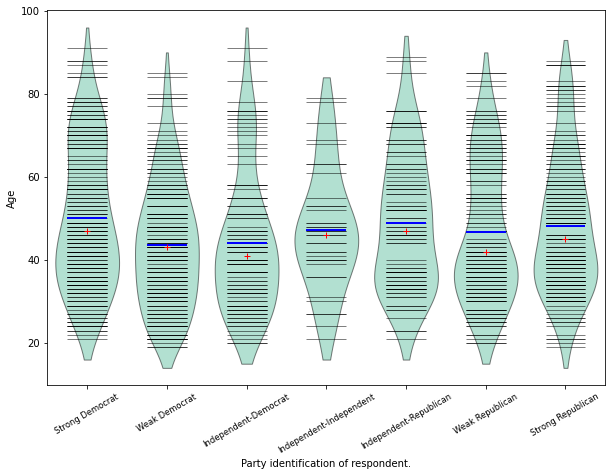

In [97]:
# STAT Models
# https://www.statsmodels.org/dev/examples/notebooks/generated/plots_boxplots.html
plt.rcParams["figure.subplot.bottom"] = 0.23  # keep labels visible
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # make plot larger in notebook
age = [data.exog["age"][data.endog == id] for id in party_ID]
fig = plt.figure()
ax = fig.add_subplot(111)
plot_opts = {
    "cutoff_val": 5,
    "cutoff_type": "abs",
    "label_fontsize": "small",
    "label_rotation": 30,
}
sm.graphics.beanplot(age, ax=ax, labels=labels, plot_opts=plot_opts)
ax.set_xlabel("Party identification of respondent.")
ax.set_ylabel("Age")
# plt.show()

PREDICTING THE RESULTS
COMPLETE PYTHON CODE FOR LINEAR REGRESSION
CREDIT: ASK PYTHON

SIMPLE REGRESSION ANALYSIS

CALCULATING MAPE
CREDIT: ASK PYTHON

In [98]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()

In [99]:
query_pred = """
SELECT * FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [100]:
query_job_pred = bigquery_client.query(query_pred)
data_pred_query = query_job_pred.to_dataframe()

In [101]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

In [102]:
# Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [103]:
import os
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [104]:
query = """
SELECT * FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [105]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [106]:
X = data['total_claims'].values.reshape(-1,1)
y = data['week_number'].values.reshape(-1,1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

COMPARE ACTUAL OUTPUT VALUES FOR X_TEST WITH PREDICTED VALUES - TEST

In [108]:
df = pd.DataFrame(np.random.rand(10, 3), columns =['a', 'b', 'c'])

In [109]:
print(df)

          a         b         c
0  0.504229  0.094327  0.493198
1  0.996791  0.849397  0.913084
2  0.428050  0.547884  0.175050
3  0.797422  0.677643  0.394793
4  0.845088  0.989179  0.139604
5  0.238539  0.005312  0.914123
6  0.680789  0.102492  0.523243
7  0.771059  0.790094  0.183582
8  0.343799  0.489644  0.206358
9  0.629905  0.587085  0.137717


DATA VISUALIZATION - COMPARISON RESULTS AS A BAR GRAPH

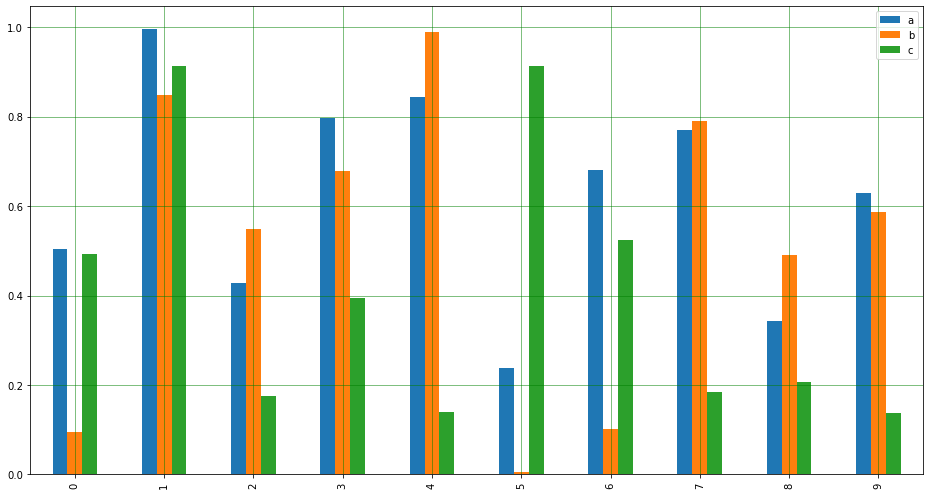

In [110]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [111]:
# importing matplotlib
import matplotlib.pyplot

In [112]:
# importing pandas as pd
import pandas as pd

In [113]:
# importing numpy as np
import numpy as np

In [114]:
# creating a dataframe
df = pd.DataFrame(np.random.rand(10, 10),
                  columns =['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [115]:
df

,a,b,c,d,e,f,g,h,i,j
0,0.033015,0.656524,0.375198,0.078599,0.041321,0.745516,0.704098,0.962203,0.412814,0.781190
1,0.298137,0.585668,0.057064,0.817526,0.267122,0.136255,0.600464,0.925917,0.074854,0.149512
2,0.685141,0.141922,0.477274,0.563631,0.483037,0.639812,0.530833,0.256880,0.068338,0.780926
3,0.899537,0.573970,0.810259,0.667801,0.099102,0.089334,0.672245,0.452322,0.213454,0.884809
4,0.038950,0.261869,0.114392,0.645330,0.495526,0.439469,0.387936,0.989101,0.913914,0.886842
5,0.253477,0.282334,0.655778,0.140403,0.087235,0.529504,0.297931,0.492372,0.963261,0.851913
6,0.578923,0.295136,0.275984,0.435698,0.003123,0.822107,0.210854,0.627202,0.159648,0.008942
7,0.900301,0.522228,0.795375,0.656109,0.659185,0.917811,0.359947,0.099565,0.560557,0.138703
8,0.779129,0.615208,0.365937,0.143944,0.477113,0.422052,0.768091,0.575733,0.296893,0.912646
9,0.029126,0.832513,0.974029,0.453453,0.640576,0.368456,0.925898,0.084722,0.975919,0.838436


<AxesSubplot:>

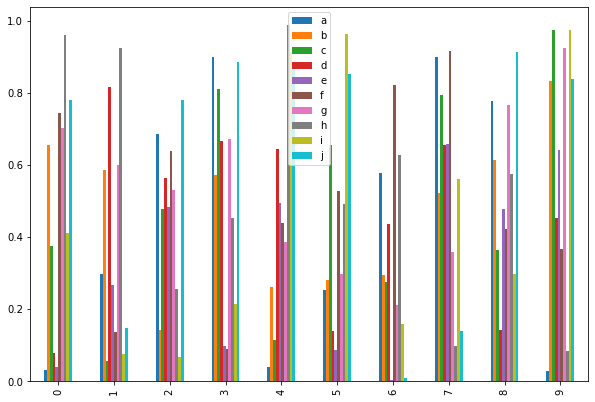

In [116]:
# using a function df.plot.bar()
df.plot.bar()

CALCULATING MAPE
CREDIT: ASK PYTHON

In [117]:
from sklearn.metrics import mean_absolute_error
Y_actual = [1,2,3,4,5]
Y_Predicted = [1,2.5,3,4.1,4.9]
mape = mean_absolute_error(Y_actual, Y_Predicted)*100
print(mape)

13.999999999999984


In [118]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
""" 

In [119]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()
unemployment_data.head(20)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>
5,25a57fe39e03c632125308737a7d3769,20220820,34,18067,300,"Census Tract 3, Howard County, Indiana",24,0,<NA>,15,...,14,10,0,0,0,<NA>,0,0,0,<NA>
6,25a57fe39e03c632125308737a7d3769,20220820,34,18067,300,"Census Tract 3, Howard County, Indiana",24,0,<NA>,15,...,14,10,0,0,0,<NA>,0,0,0,<NA>
7,45c8cf419dd4c4b442dbf3603ba94379,20220129,5,18003,3200,"Census Tract 32, Allen County, Indiana",19,<NA>,<NA>,<NA>,...,11,<NA>,<NA>,0,<NA>,<NA>,<NA>,0,<NA>,12
8,8f782a6153268c6031e31784e2d4eae2,20220716,29,18089,42000,"Census Tract 420, Lake County, Indiana",20,0,<NA>,10,...,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,0,<NA>,14
9,5c04f20bd2f8552aa7ac210dc01292fb,20220611,24,18089,42200,"Census Tract 422, Lake County, Indiana",12,<NA>,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,<NA>,<NA>


In [120]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
""" 

In [121]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
wage_data = query_job.to_dataframe()
wage_data.head(20)

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667
5,3ebec5c7e13f05f1772dae73f3a1f5e0,18003,11302,"Census Tract 113.02, Allen County, Indiana",9201.800000
6,4e47a34030916597b6293593de5016a2,18003,2300,"Census Tract 23, Allen County, Indiana",7106.857143
7,9b461ff4ed0094dc132cb01b2e1db9ba,18003,2800,"Census Tract 28, Allen County, Indiana",7807.250000
8,f013068de98db1470bd986137a0c6d23,18003,900,"Census Tract 9, Allen County, Indiana",8347.125000
9,d9f6293ea290fd5f01904c594b5a90b9,18003,10821,"Census Tract 108.21, Allen County, Indiana",6903.666667


In [122]:
query = """
SELECT * FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [123]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head(20)

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44
5,489a93264d03adecc4589fd9cd34ad36,44
6,f61f291c865fe4fe2bfd6dad53e5d058,44
7,f4520092ddd64f380cc29f27329112a6,44
8,447d5984bb8a8179bff002ccd1bba162,44
9,56d73815bdda97aca8e26051183ed3ba,44


USING DATA SCIENCE OPERATIONS
SOURCE: REALPYTHON https://realpython.com/numpy-tutorial/#using-ipython-notebooks-or-jupyterlab
MASKING AND FILTERING - creating an array that has the same shape as your data

In [124]:
import numpy as np
numbers = np.linspace(5, 50, 24, dtype=int).reshape(4, -1)
numbers

array([[ 5,  6,  8, 10, 12, 14],
       [16, 18, 20, 22, 24, 26],
       [28, 30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48, 50]])

USING DATA SCIENCE OPERATIONS
SOURCE: REALPYTHON https://realpython.com/numpy-tutorial/#using-ipython-notebooks-or-jupyterlab
MASKING AND FILTERING - creating an array that has the same shape as your data

In [125]:
mask = numbers % 4 == 0
mask

array([[False, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False]])

In [126]:
# Input 4 creates the mask
numbers[mask]

array([ 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])

In [127]:
by_four = numbers[numbers % 4 == 0]
by_four

array([ 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])

In [128]:
# USING MATPLOTLIB - image
# A WAY TO COMMUNICATE DATA AND RESULTS
# UNEMPLOYMENT RATES OCTOBER 2022 - Indiana Image
# SOURCE: http://www.stats.indiana.edu/maptools/laus.asp
# insall image
# using opencv
path = "http://www.stats.indiana.edu/maptools/laus.asp"

In [129]:
import numpy as np
import matplotlib.image as mpimg

In [130]:
img = mpimg.imread (http://www.stats.indiana.edu/maptools/laus.asp)
print(type(img) )
print(img.shape )

SyntaxError: invalid syntax (2913591077.py, line 1)

# This can also be a good place for you to cleanup any input/output and export your results to a file.
REFERENCE: https://www.askpython.com/python/examples/linear-regression-in-python

# This can also be a good place for you to cleanup any input/output and export your results to a file.
REFERENCE: https://www.askpython.com/python/examples/linear-regression-in-python